# 导入模块

In [8]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from toad.detector import detect
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

warnings.filterwarnings("ignore")
pd.set_option("display.width", 10000)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
sns.set(style="white", context="notebook")
plt.rcParams['font.sans-serif']=['FangSong']
plt.rcParams['axes.unicode_minus']=False

%matplotlib inline

# 加载数据

In [2]:
data = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 数据探索

## 查看数据

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 数据类型、大小和唯一值

In [4]:
detect(data)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
customerID,object,7043,0.00%,7043,7590-VHVEG:0.01%,3791-LGQCY:0.01%,6008-NAIXK:0.01%,5956-YHHRX:0.01%,5365-LLFYV:0.01%,9796-MVYXX:0.01%,2637-FKFSY:0.01%,1552-AAGRX:0.01%,4304-TSPVK:0.01%,3186-AJIEK:0.01%
gender,object,7043,0.00%,2,Male:50.48%,Female:49.52%,None,None,None,None,None,None,Male:50.48%,Female:49.52%
SeniorCitizen,int64,7043,0.00%,2,0.162147,0.368612,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Partner,object,7043,0.00%,2,No:51.70%,Yes:48.30%,None,None,None,None,None,None,No:51.70%,Yes:48.30%
Dependents,object,7043,0.00%,2,No:70.04%,Yes:29.96%,None,None,None,None,None,None,No:70.04%,Yes:29.96%
tenure,int64,7043,0.00%,73,32.371149,24.559481,0.0,1.0,2.0,29.0,55.0,69.0,72.0,72.0
PhoneService,object,7043,0.00%,2,Yes:90.32%,No:9.68%,None,None,None,None,None,None,Yes:90.32%,No:9.68%
MultipleLines,object,7043,0.00%,3,No:48.13%,Yes:42.18%,No phone service:9.68%,None,None,None,None,No:48.13%,Yes:42.18%,No phone service:9.68%
InternetService,object,7043,0.00%,3,Fiber optic:43.96%,DSL:34.37%,No:21.67%,None,None,None,None,Fiber optic:43.96%,DSL:34.37%,No:21.67%
OnlineSecurity,object,7043,0.00%,3,No:49.67%,Yes:28.67%,No internet service:21.67%,None,None,None,None,No:49.67%,Yes:28.67%,No internet service:21.67%


## 预处理

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

## 缺失值填充

In [6]:
data.TotalCharges.fillna(value=data['TotalCharges'].median(), inplace=True)

# 特征分析

## 客户是否流失：Churn

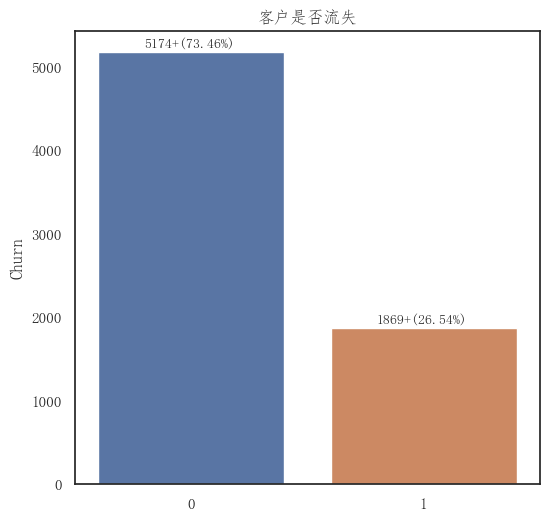

In [11]:
plt.figure(figsize=(6, 6), dpi=100)
target_group = data["Churn"].value_counts()
plt.title("客户是否流失")
ax = sns.barplot(x=target_group.index.tolist(), y=target_group)
for i, j in enumerate(target_group.tolist()):
    plt.text(i-0.2, j+50, "{}+({:.2%})".format(j, j/target_group.sum()))

## 性别：gender

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
